# Ecomvision Project

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

## Loading the dataset

In [2]:
ecom=pd.read_csv("online_shoppers_intention.csv")
ecom

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Data reading and visualisation

In [3]:
ecom.shape

(12330, 18)

In [4]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
pd.set_option("display.max_columns",None)
ecom.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
ecom_cat=ecom.select_dtypes(include=["object","bool"])
ecom_cat

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False
...,...,...,...,...
12325,Dec,Returning_Visitor,True,False
12326,Nov,Returning_Visitor,True,False
12327,Nov,Returning_Visitor,True,False
12328,Nov,Returning_Visitor,False,False


In [7]:
ecom_cat.isnull().sum()

Month          0
VisitorType    0
Weekend        0
Revenue        0
dtype: int64

In [8]:
ecom_cat.nunique()

Month          10
VisitorType     3
Weekend         2
Revenue         2
dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


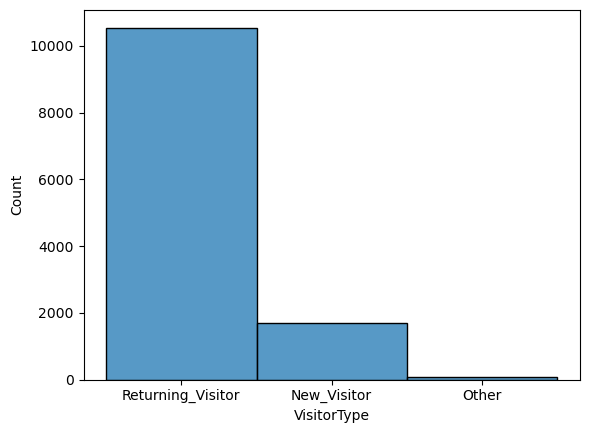

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [9]:
sns.histplot(ecom_cat["VisitorType"])
plt.show()
ecom_cat["VisitorType"].value_counts()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


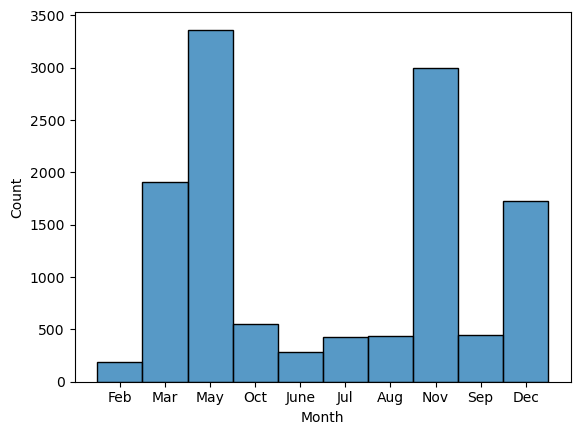

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [10]:
sns.histplot(ecom_cat["Month"])
plt.show()
ecom_cat["Month"].value_counts()

In [11]:
ecom_num=ecom.select_dtypes(exclude=["object","bool"])
ecom_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [12]:
ecom_num.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
dtype: int64

In [13]:
ecom_num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
ecom

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [15]:
X=ecom.iloc[:,:-1]
y=ecom.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,chi2
from imblearn.pipeline import Pipeline as IMBPipeline 


def scaling_dataframe(X,y):
   
    trf1 = ColumnTransformer([
        ("imputer1",SimpleImputer(strategy="mean"),[3]),
        ("imputer2",SimpleImputer(strategy="median"),[5]),
        ], remainder="passthrough") 

      
    trf2=ColumnTransformer([
        ("ohe",OneHotEncoder(sparse_output=False,drop='first'),[10,15,16]),
        ],remainder="passthrough")
    '''When sparse_output is set to False (which is the default), the output of OneHotEncoder will be a dense NumPy array.
    Each row of this array represents the one-hot encoded representation of a single input sample.
    Conversely, when sparse_output is set to True, the output will be in sparse matrix format, specifically a scipy.sparse.csr_matrix. 
    This format can be more memory-efficient, especially when dealing with large datasets where most entries are zero after one-hot encoding.'''
     
    trf3 = ColumnTransformer([
        ("scale1",MinMaxScaler(),slice(0,29)),
        ],remainder="passthrough")
    
   
                    
    smote=SMOTE(random_state=1)
    feature_selection=SelectKBest(score_func=chi2, k=10)
   
    
    pipe = IMBPipeline([
        ("trf1",trf1),
        ("trf2",trf2),
        ("trf3",trf3),
        ("smote",smote),
        ("feature_selection",feature_selection)
    ])
    X_trans=pipe.fit_transform(X,y)
    return X_trans
    
result=scaling_dataframe(X_train,y_train)
result

array([[0.        , 0.        , 0.        , ..., 0.33333334, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03875969, 0.01561238,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.10565828, 0.03082103,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05280923, 0.0588159 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04552677, 0.12582179,
        0.        ]])

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2

def scaling_dataframe(X, y,model):
    trf1 = ColumnTransformer([
        ("imputer1", SimpleImputer(strategy="mean"), [3]),
        ("imputer2", SimpleImputer(strategy="median"), [5]),
    ], remainder="passthrough") 
    
    trf2 = ColumnTransformer([
        ("ohe", OneHotEncoder(sparse_output=False, drop='first'), [10, 15, 16]),
    ], remainder="passthrough")
    
    trf3 = ColumnTransformer([
        ("scale1", MinMaxScaler(), slice(0, 29)),
    ], remainder="passthrough")

    smote = SMOTE(random_state=1)
    feature_selection = SelectKBest(score_func=chi2, k=10)
    model=model

    pipe = IMBPipeline([
        ("trf1", trf1),
        ("trf2", trf2),
        ("trf3", trf3),
        ("smote", smote),
        ("feature_selection", feature_selection),
        ('model',model)
    ])
    
    # X_transformed = pipe.fit_transform(X, y)
    #return X_transformed
    return pipe




In [20]:
from sklearn.model_selection import GridSearchCV

def select_model(X, y,pipeline=None):
    classifiers = {
        "DummyClassifier": DummyClassifier(strategy='most_frequent'),
        "RandomForest": RandomForestClassifier(),
        "LogisticRegression": LogisticRegression(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "SGDClassifier": SGDClassifier(),
        "RidgeClassifier": RidgeClassifier(),
        "ExtraTreeClassifier": ExtraTreesClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "LGBMClassifier": LGBMClassifier(),
        "XGBClassifier": XGBClassifier(),
        "BaggingClassifier": BaggingClassifier(),
        "BernoulliNB": BernoulliNB(),
        "SVC": SVC()
       }
    
    
    
    cols = ['model', 'run_time', 'roc_auc']
    df_models = pd.DataFrame(columns=cols)
    
    best_model =None
    best_score =-1
    
    for key in classifiers:
        start_time = time.time()
        print("Step 12: scaling_pipeline run successfully on", key)

        pipeline = scaling_dataframe(X,y, classifiers[key])
        cv = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='roc_auc')
        
        row = {'model': key, 'run_time': format(round((time.time() - start_time)/60, 2)), 'roc_auc': cv.mean()}
        
        df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)
        
        if cv.mean() > best_score:
                best_score = cv.mean()
                best_model = classifiers[key]
            
    df_models = df_models.sort_values(by='roc_auc', ascending=False)
    return best_model,df_models

print("Step 11: Accessing select_model function done successfully")


best_model,models = select_model(X_train, y_train)




###################################
# Lets see total model with score #
###################################

print("Step 13: Accessing select_model function done successfully")
print()

print(models)



Step 11: Accessing select_model function done successfully
Step 12: scaling_pipeline run successfully on DummyClassifier


C:\Users\user\AppData\Local\Temp\ipykernel_7916\472539513.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)


Step 12: scaling_pipeline run successfully on RandomForest
Step 12: scaling_pipeline run successfully on LogisticRegression
Step 12: scaling_pipeline run successfully on DecisionTreeClassifier
Step 12: scaling_pipeline run successfully on AdaBoostClassifier
Step 12: scaling_pipeline run successfully on SGDClassifier
Step 12: scaling_pipeline run successfully on RidgeClassifier
Step 12: scaling_pipeline run successfully on ExtraTreeClassifier
Step 12: scaling_pipeline run successfully on KNeighborsClassifier
Step 12: scaling_pipeline run successfully on LGBMClassifier
[LightGBM] [Info] Number of positive: 6579, number of negative: 6579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 13158, number of used features: 10
[Lig

In [21]:
print()
print("Step 14: Accessing select_model function done successfully")

selected_model = best_model
print("Best model is:-",selected_model)
bundled_pipeline = scaling_dataframe(X_train,y_train ,selected_model)
bundled_pipeline.fit(X_train, y_train)

#####################################
# Accessing best model and training #
#####################################

print("Step 15: Results predicted successfully")

y_pred = bundled_pipeline.predict(X_test)

#####################
# ROC and AOC score #
#####################

print("Step 16: ROC and AOC scores")

roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f11_score = f1_score(y_test, y_pred)

print()
print('ROC/AUC:', roc_auc)
print('Accuracy:', accuracy)
print('F1 score:', f11_score)
print()
#########################
# Classification report #
#########################

print("Step 17: classification report generated successfully")

classif_report = classification_report(y_test, y_pred)

print(classif_report)




Step 14: Accessing select_model function done successfully
Best model is:- LGBMClassifier()
[LightGBM] [Info] Number of positive: 7310, number of negative: 7310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 14620, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Step 15: Results predicted successfully
Step 16: ROC and AOC scores

ROC/AUC: 0.8265662840551277
Accuracy: 0.8988915923222492
F1 score: 0.6934426229508196

Step 17: classification report generated successfully
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3112
        True       0.67      0.72      0.69       587

    accuracy                           0.90      3699
   macro avg       0.81      0.83      0.8